# Chapter 9 - Supervised Learning - Regression Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

## Linear Regression


In [4]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/bloodpress.txt"

# Reading the CSV file
data = pd.read_csv(url, sep='\t')

# Display the first 5 rows of the DataFrame
data.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


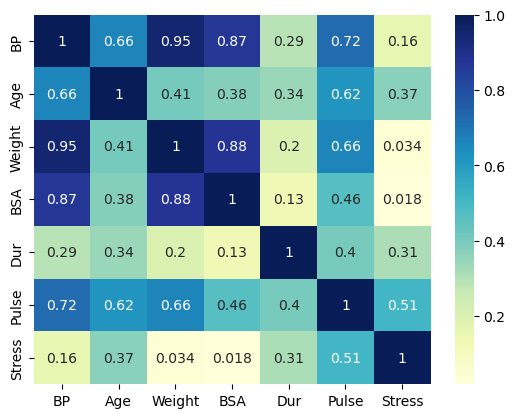

In [5]:
# Correlation matrix
corr=data.corr()

# Plot Heatmap on correlation matrix
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# display the plot
plt.show()

Here, `BP` (Blood Pressure) is the dependent or target variable, and the rest of the columns
are independent variables or features. We can see that `Weight` and `BSA` (Body Surface
Area) have a high correlation. We need to remove one variable (either `Weight` or `BSA`) to
remove the multicollinearity. In our case, weight is easier to measure compared to `BSA`, so
experts will choose the `weight` and remove the `BSA`.

In [7]:
# Create pandas DataFrame
data2 = pd.DataFrame({'Gender':['F','M','M','F','M']})

# Check the top-5 records
data2.head()

,Gender
0,F
1,M
2,M
3,F
4,M


In [8]:
# Dummy encoding
encoded_data = pd.get_dummies(data2['Gender']).astype(int)

# Check the top-5 records of the dataframe
encoded_data.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [9]:
# Dummy encoding
encoded_data = pd.get_dummies(data2['Gender'], drop_first=True).astype(int)

# Check the top-5 records of the dataframe
encoded_data.head()

,M
0,0
1,1
2,1
3,0
4,1


In [10]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/Advertising.csv"

df = pd.read_csv(url)

# See the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']]

# Dependent or Target variable
y = df[['Sales']]

In [12]:
from sklearn.model_selection import train_test_split

# Distribute the features(X) and labels(y) into two parts training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, 
                                                    random_state=0)

Let's import the LinearRegression model, create its object, and fit it to the training dataset (X_train, y_train). After fitting the model, we can predict the values for testing data (X_test). We can see the intercept and coefficient of the regression equation using the `intercept_` and `coef_` attributes:

In [14]:
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression()

# Fit the linear regression model
lin_reg.fit(X_train, y_train)

# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print("Intercept:",lin_reg.intercept_)
print("Coefficients:",lin_reg.coef_)

Intercept: [2.89257005]
Coefficients: [[0.04416235 0.19900368 0.00116268]]


### Evaluating Regression Model Performance

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))

# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))

# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))

# Evaluate R-square
print("R-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 1.3000320919235455
Mean Squared Error(MSE): 4.0124975229171
Root Mean Squared Error(RMSE): 2.003121944095541
R-Square: 0.8576396745320893


Here, R-squared is 0.85, which indicates that the model explains the 85% variability of the data.

## Fitting Polynomial Regression

Text(0, 0.5, 'y-Axis')

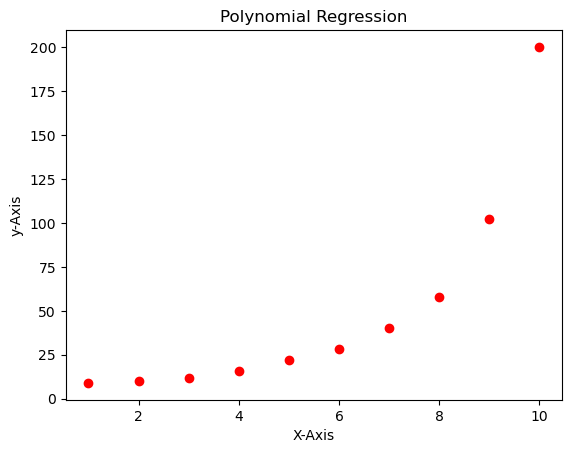

In [19]:
# Create X and Y lists
X=[1,2,3,4,5,6,7,8,9,10]
y=[9,10,12,16,22,28,40,58,102,200]

# Plot scatter diagram
plt.scatter(X,y, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare dataset
data = pd.DataFrame({"X":[1,2,3,4,5,6,7,8,9,10], "y":[9,10,12,16,22,28,40,58,102,200]})
X = data[['X']] 
y = data[['y']]

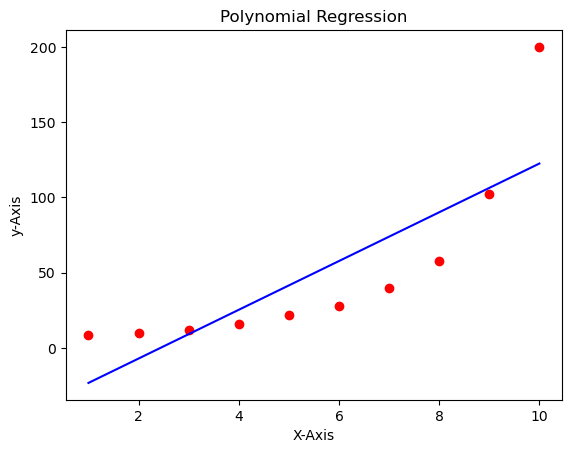

In [21]:
# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 1)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

# Plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis');

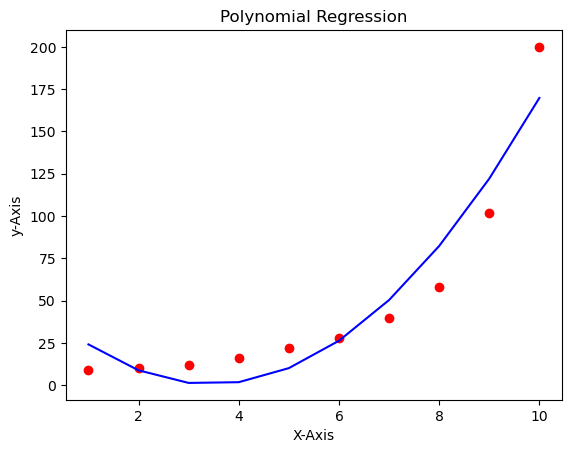

In [22]:
# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 2)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

# Plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis');

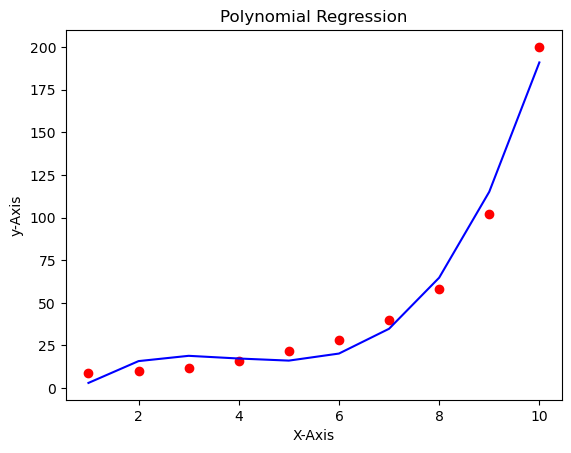

In [23]:
# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 3)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

# Plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis');

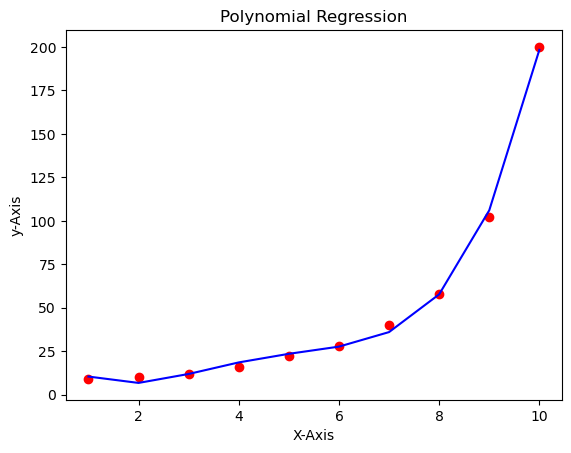

In [24]:
# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 4)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

# Plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis');

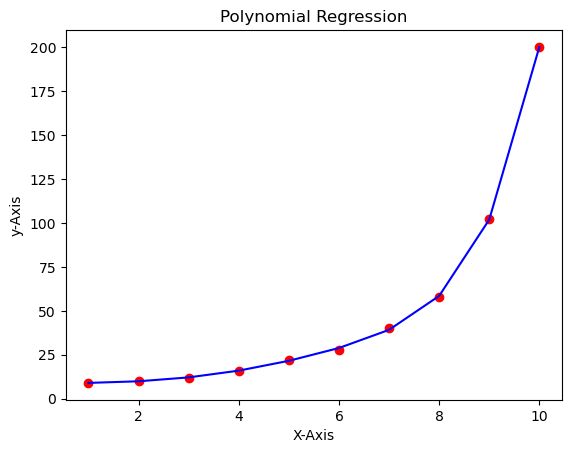

In [25]:
# Apply Polynomial Features
polynomial_reg = PolynomialFeatures(degree = 6)
X_polynomial = polynomial_reg.fit_transform(X)

# Apply Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_polynomial, y)
predictions=linear_reg.predict(X_polynomial)

# Plot the results
plt.scatter(X,y, color = 'red')
plt.plot(X, predictions, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis');

# Logistic Regression

The logistic regression model not only provides prediction (0 or 1) but also gives the
probabilities of outcomes, which helps us to understand the confidence of a prediction. It is
easy to implement and understand and is interpretable.

A large number of independent variables will increase the amount of variance explained,
which results in model overfitting. Logistic regression cannot work with non-linear
relationships. It will also not perform well with highly correlated feature variables (or
independent variables).

In [28]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter09/diabetes.csv'

# read the dataset
diabetes = pd.read_csv(url)

# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Split dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

features = diabetes[feature_set]
target = diabetes[['label']]

# Partition data into training and testing set
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.3, 
                                                                          random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

# Instantiate the model with an increased max_iter
logreg = LogisticRegression(solver='lbfgs', max_iter=200)

# Fit the model with the scaled data and target values as a flattened array
logreg.fit(feature_train_scaled, target_train.values.ravel())

# Make predictions on the test set
predictions = logreg.predict(feature_test_scaled)

# Assess model performance
print("Logistic Regression Model Accuracy:", accuracy_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.7835497835497836


In [31]:
# Retrieve the coefficients and the intercept
coefficients = logreg.coef_[0]    # Coefficients for each feature (array)
intercept = logreg.intercept_[0]  # The intercept term

# Create a DataFrame to map feature names to their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_train.columns,
    'Coefficient': coefficients
})

# Sort by the magnitude of the coefficients to see the most impactful features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Model Intercept:", intercept)
print("\nFeature Contributions:\n", feature_importance_sorted[['Feature', 'Coefficient']])

Model Intercept: -0.9038292821211673

Feature Contributions:
     Feature  Coefficient
4   glucose     1.034264
2       bmi     0.665845
0  pregnant     0.335844
5        bp    -0.310023
3       age     0.206671
6  pedigree     0.198851
1   insulin    -0.083374


### Interpretation

##### Model Intercept

`Intercept (-0.9038)`: This is the baseline log-odds of the model when all feature values are 0. It essentially acts as a starting point for the model’s prediction before any feature contributions are added.

##### Feature Coefficients

`glucose (1.0343)`: This is the most influential feature in the model with a positive coefficient.
A unit increase in the standardized glucose level will significantly increase the log-odds of the positive class (e.g., predicting the presence of a condition).

`bmi (0.6658)`: This is the second most impactful feature, also with a positive coefficient.
Higher bmi values contribute to a higher probability of the positive class.

`pregnant (0.3358)`: Being pregnant also increases the likelihood of the positive class, but its effect is smaller compared to glucose and bmi.

`bp (-0.3100)`: This feature has a negative coefficient, indicating that higher blood pressure (bp) is associated with a lower likelihood of the positive class in this model. Although the magnitude is significant, its effect decreases the probability of the outcome.

`age (0.2067)`: Age has a positive impact on the prediction, indicating that as age increases, so does the likelihood of the positive class.
However, its influence is less compared to glucose, bmi, and pregnant.

`pedigree (0.1989)`: The pedigree feature (which might be a diabetes pedigree function indicating genetic influence) has a relatively small positive impact on the prediction.
It contributes positively but with a minor effect compared to the top features.

`insulin (-0.0834)`: This feature has the smallest coefficient in magnitude and a negative effect.
Higher values of insulin slightly decrease the probability of the positive outcome.